In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from itertools import count

import ssl  #접속보안 허용

In [2]:
def get_request_url(url, enc='utf-8'): 
    req = urllib.request.Request(url)
    try:
        ssl._create_default_https_context = ssl._create_unverified_context    #접속보안 허용
        
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            try:
                rcv = response.read()
                ret = rcv.decode(enc)
            except UnicodeDecodeError:
                ret = rcv.decode(enc, 'replace')    
            
            return ret
            
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [10]:
def getAddress(result):
    for page_idx in count():
        JobKorea_URL1 = 'http://www.jobkorea.co.kr/Salary/Index?coKeyword=&tabindex=2&indsCtgrCode=&indsCode=&jobTypeCode=10016&haveAGI=0&orderCode=2&coPage=%s'% str(page_idx + 1) 
        JobKorea_URL2 = '#salarySearchCompany'
        JobKorea_URL = JobKorea_URL1 + JobKorea_URL2
        rcv_data = get_request_url(JobKorea_URL)
        soupData = BeautifulSoup(rcv_data, 'html.parser')     
        list_table = soupData.find('ul', attrs={'class':'list', 'id':'listCompany'}) #해당위치 
        
        print ("[Page] : [%s]" % (str(page_idx + 1)))
               
        bEnd = True
        for jobkorea_li in list_table.findAll('li'):       
            bEnd = False
            li_tag = list(jobkorea_li.strings)
            li_tag_new_list = []
            for v in li_tag: #중복제거, \n을 제거함
                if v not in li_tag_new_list:
                    li_tag_new_list.append(v)
            
            li_tag_new_list.remove('\n') #중복제거하고 남은 하나 제거
            li_tag_new_list.remove('좋아요') #필요없는정보 제거
            li_tag_new_list.remove('만원')
            
            if '채용중' in li_tag_new_list:
                li_tag_new_list.remove('채용중')
                
            for i in li_tag_new_list:#외국계 회사의 경우 매출액이 비어있음. 공통적으로 비워둠
                if '매출액' in i:
                    li_tag_new_list.remove(i)
            
            cnt = 0
            for i in li_tag_new_list:#사원수 100명 이런 식으로 되어 있기 때문에 숫자만 남겨두도록 함
                if '사원수' in i:
                    tmp = i.split(' ')
                    li_tag_new_list[cnt] = tmp[1][:-1]#100명 이런 식으로 남아있는 중에 뒤에 '명' 제거        
                cnt += 1
                
            if len(li_tag_new_list) == 4: #산업이나 사원수가 없는 정보일 수도 있다. 월급만 본다면 필요는 없는데 csv파일 정리나 정돈화된 데이터가 필요하다면 적용       
             
                if ',' in li_tag_new_list[2]:#사원수를 숫자로 쓰기 위해 ','없애기
                    tmp2 = li_tag_new_list[2].split(',')
                    tmp3 = tmp2[0]+tmp2[1]
                    li_tag_new_list[2] = tmp3
                    
                if ',' in li_tag_new_list[3]:#연봉을 숫자로 쓰기 위해 ','없애기
                    tmp2 = li_tag_new_list[3].split(',')
                    tmp3 = tmp2[0]+tmp2[1]
                    li_tag_new_list[3] = tmp3    
                 
                cnt = 0
                
                if '·' in li_tag_new_list[2]:#사원 수에 이상한 값 제거
                    li_tag_new_list[2] = 0
                                    
                result.append(li_tag_new_list)

                        
        if (bEnd == True):
            print(result[0]) #확인용으로 출력
            print("== 데이터 수 : %d" %len(result))
            return

    return

In [11]:
result = []
print('CRAWLING START')
getAddress(result)

jobkorea_table = pd.DataFrame(result, columns=('회사', '산업', '사원수', '연봉'))
jobkorea_table.to_csv("./jobkorea.csv", encoding="cp949", mode='w', index=True)
print('FINISHED')

CRAWLING START
[Page] : [1]
[Page] : [2]
[Page] : [3]
[Page] : [4]
[Page] : [5]
[Page] : [6]
[Page] : [7]
[Page] : [8]
[Page] : [9]
[Page] : [10]
[Page] : [11]
[Page] : [12]
[Page] : [13]
[Page] : [14]
[Page] : [15]
[Page] : [16]
[Page] : [17]
[Page] : [18]
[Page] : [19]
[Page] : [20]
[Page] : [21]
[Page] : [22]
[Page] : [23]
[Page] : [24]
[Page] : [25]
[Page] : [26]
[Page] : [27]
[Page] : [28]
[Page] : [29]
[Page] : [30]
[Page] : [31]
[Page] : [32]
[Page] : [33]
[Page] : [34]
[Page] : [35]
[Page] : [36]
[Page] : [37]
[Page] : [38]
[Page] : [39]
[Page] : [40]
[Page] : [41]
[Page] : [42]
[Page] : [43]
[Page] : [44]
[Page] : [45]
[Page] : [46]
[Page] : [47]
[Page] : [48]
[Page] : [49]
[Page] : [50]
[Page] : [51]
[Page] : [52]
[Page] : [53]
[Page] : [54]
[Page] : [55]
[Page] : [56]
[Page] : [57]
[Page] : [58]
[Page] : [59]
[Page] : [60]
[Page] : [61]
[Page] : [62]
[Page] : [63]
[Page] : [64]
[Page] : [65]
[Page] : [66]
[Page] : [67]
[Page] : [68]
[Page] : [69]
[Page] : [70]
[Page] : [71]


[Page] : [554]
[Page] : [555]
[Page] : [556]
[Page] : [557]
[Page] : [558]
[Page] : [559]
[Page] : [560]
[Page] : [561]
[Page] : [562]
[Page] : [563]
[Page] : [564]
[Page] : [565]
[Page] : [566]
[Page] : [567]
[Page] : [568]
[Page] : [569]
[Page] : [570]
[Page] : [571]
[Page] : [572]
[Page] : [573]
[Page] : [574]
[Page] : [575]
[Page] : [576]
[Page] : [577]
[Page] : [578]
[Page] : [579]
[Page] : [580]
[Page] : [581]
[Page] : [582]
[Page] : [583]
[Page] : [584]
[Page] : [585]
[Page] : [586]
[Page] : [587]
[Page] : [588]
[Page] : [589]
[Page] : [590]
[Page] : [591]
[Page] : [592]
[Page] : [593]
[Page] : [594]
[Page] : [595]
[Page] : [596]
[Page] : [597]
[Page] : [598]
[Page] : [599]
[Page] : [600]
[Page] : [601]
[Page] : [602]
[Page] : [603]
[Page] : [604]
[Page] : [605]
[Page] : [606]
[Page] : [607]
[Page] : [608]
[Page] : [609]
[Page] : [610]
[Page] : [611]
[Page] : [612]
[Page] : [613]
[Page] : [614]
[Page] : [615]
[Page] : [616]
[Page] : [617]
[Page] : [618]
[Page] : [619]
[Page] : [

# 코드 위치를 알기위한 세부조사

In [5]:
#전체 소스코드 파악
JobKorea_URL = 'http://www.jobkorea.co.kr/Salary/Index?coKeyword=&tabindex=2&indsCtgrCode=&indsCode=&jobTypeCode=10016&haveAGI=0&orderCode=2&coPage=1#salarySearchCompany'
rcv_data = get_request_url(JobKorea_URL)
soupData = BeautifulSoup(rcv_data, 'html.parser')
print(soupData)


<!DOCTYPE html>

<html lang="ko">
<head>
<title>IT·인터넷 연봉 정보 - 기업, 분야, 직원별 평균 연봉 | 잡코리아</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//www.jobkorea.co.kr/favicon.ico?v1904091400" rel="SHORTCUT ICON"/>
<link href="https://www.jobkorea.co.kr/salary/index?coKeyword=&amp;tabindex=2&amp;indsCtgrCode=&amp;indsCode=&amp;jobTypeCode=10016&amp;haveAGI=0&amp;orderCode=2&amp;coPage=1" rel="canonical">
<link href="https://m.jobkorea.co.kr/salary/index?coKeyword=&amp;tabindex=2&amp;indsCtgrCode=&amp;indsCode=&amp;jobTypeCode=10016&amp;haveAGI=0&amp;orderCode=2&amp;coPage=1" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="ios-app://569092652/http/m.jobkorea.co.kr/salary/index?coKeyword=&amp;tabindex=2&amp;indsCtgrCode=&amp;indsCode=&amp;jobTypeCode=10016&amp;haveAGI=0&amp;orderCode=2&amp;coPage=1" rel="alternate"/>
<link href="android-app://com.jobkorea.app/http/m.jobkorea.co.kr/salary/index?coKeyword=&amp;tabindex=2&amp

In [6]:
#잡리스트가 포함된 부분을 파악
JobKorea_URL = 'http://www.jobkorea.co.kr/Salary/Index?coKeyword=&tabindex=2&indsCtgrCode=&indsCode=&jobTypeCode=10016&haveAGI=0&orderCode=2&coPage=1#salarySearchCompany'
rcv_data = get_request_url(JobKorea_URL)
soupData = BeautifulSoup(rcv_data, 'html.parser')
list_table = soupData.find('ul', attrs={'class':'list', 'id':'listCompany'})
print(list_table)

<ul class="list" id="listCompany">
<li>
<a href="/Salary/55541">
<div class="thumbnail">
<img onerror="this.parentElement.setAttribute('class','thumbnail thumbnailText');this.parentElement.removeChild(this);" src="http://img.jobkorea.kr/images/logo/200/d/a/daumhrteam_200.gif"/>
<div class="inner">카카오</div>
</div>
<div class="headers">
<div class="text">카카오</div>
<button class="button buttonFavorites" data-mem-sys="" onclick="JKLoginLayer.open('/Salary/Index#listCompany');return false;" type="button">좋아요</button>
<div class="badge">채용중</div>
</div>
<div class="summary">
<div class="item">포털·컨텐츠·커뮤니티</div>
<div class="item">매출액 1조 5,134억원</div>
<div class="item">사원수 2,746명</div>
</div>
<div class="salary">
<div class="inner"><strong>4,159</strong>만원</div>
</div>
</a>
</li>
<li>
<a href="/Salary/671114">
<div class="thumbnail">
<img onerror="this.parentElement.setAttribute('class','thumbnail thumbnailText');this.parentElement.removeChild(this);" src="http://img.jobkorea.kr/images/logo/200

In [7]:
#원하는 데이터를 얻기위한 분리작업 연습
JobKorea_URL = 'http://www.jobkorea.co.kr/Salary/Index?coKeyword=&tabindex=2&indsCtgrCode=&indsCode=&jobTypeCode=10016&haveAGI=0&orderCode=2&coPage=1#salarySearchCompany'
rcv_data = get_request_url(JobKorea_URL)
soupData = BeautifulSoup(rcv_data, 'html.parser')     
list_table = soupData.find('ul', attrs={'class':'list', 'id':'listCompany'}) #해당위치          
for jobkorea_li in list_table.findAll('li'):            
    li_tag = list(jobkorea_li.strings)
    li_tag_new_list = []
    for v in li_tag: #중복제거, \n을 제거함
        if v not in li_tag_new_list:
            li_tag_new_list.append(v)
            
    li_tag_new_list.remove('\n') #중복제거하고 남은 하나 제거
    #필요없는정보 제거
    li_tag_new_list.remove('좋아요')
    li_tag_new_list.remove('만원')
    
    if '채용중' in li_tag_new_list:
        li_tag_new_list.remove('채용중')
    
    for i in li_tag_new_list:#외국계 회사의 경우 매출액이 비어있음. 공통적으로 비워둠
        if '매출액' in i:
            li_tag_new_list.remove(i)
          
    cnt = 0
    for i in li_tag_new_list:#사원수 100명 이런 식으로 되어 있기 때문에 숫자만 남겨두도록 함
        if '사원수' in i:
            tmp = i.split(' ')
            li_tag_new_list[cnt] = tmp[1][:-1]#100명 이런 식으로 남아있는 중에 뒤에 '명' 제거        
        cnt += 1
    
    if len(li_tag_new_list) == 4: #산업이나 사원수가 없는 정보일 수도 있다. 월급만 본다면 필요는 없는데 csv파일 정리나 정돈화된 데이터가 필요하다면 적용       
        if ',' in li_tag_new_list[2]:#사원수를 숫자로 쓰기 위해 ','없애기
            tmp2 = li_tag_new_list[2].split(',')
            tmp3 = tmp2[0]+tmp2[1]
            li_tag_new_list[2] = tmp3
                    
        if ',' in li_tag_new_list[3]:#연봉을 숫자로 쓰기 위해 ','없애기
            tmp2 = li_tag_new_list[3].split(',')
            tmp3 = tmp2[0]+tmp2[1]
            li_tag_new_list[3] = tmp3    
                 
        print(li_tag_new_list) 

['카카오', '포털·컨텐츠·커뮤니티', '2746', '4159']
['아프리카티비', '솔루션·SI·CRM·ERP', '500', '4085']
['삼성전자', '전기·전자·제어', '108682', '5598']
['애플코리아', '전기·전자·제어', '130000', '3450']
['스타벅스커피코리아', '음식료·외식·프랜차이즈', '10734', '7433']
['네이버', '포털·컨텐츠·커뮤니티', '2963', '5099']
['에스케이하이닉스', '전기·전자·제어', '28743', '5273']
['현대모비스', '자동차·조선·철강·항공', '10143', '6400']
['넷마블', '게임·애니메이션', '789', '4156']
['비지에프', '백화점·유통·도소매', '2156', '4333']
['농협정보시스템', '컴퓨터·하드웨어·장비', '514', '5405']
['LG', '자동차·조선·철강·항공', '172', '3900']
['노브랜드', '섬유·의류·패션', '350', '4100']
['와이지원', '금속·재료·자재', '1500', '3781']
['삼구아이앤씨', '시설관리·보안·경비', '37000', '4225']
['하이트진로', '식품가공', '2936', '5500']
['한국전력공사', '공기업·공공기관', '22545', '4650']
['야놀자', '포털·컨텐츠·커뮤니티', '500', '3613']
['에스엠엔터테인먼트', '연예·엔터테인먼트', '473', '3275']
['삼양식품', '식품가공', '1728', '5780']
['앰코테크놀로지코리아', '전기·전자·제어', '6071', '4290']
['기아자동차', '자동차·조선·철강·항공', '35343', '2100']
['컴퓨존', '쇼핑몰·오픈마켓·소셜커머스', '411', '3259']
['대상', '식품가공', '5628', '5184']
['엔씨소프트', '게임·애니메이션', '3755', '4359']
['구글코리아', '포털·컨

In [8]:
#csv저장 테스트
result = []
print('CRAWLING START')
JobKorea_URL = 'http://www.jobkorea.co.kr/Salary/Index?coKeyword=&tabindex=2&indsCtgrCode=&indsCode=&jobTypeCode=10016&haveAGI=0&orderCode=2&coPage=1#salarySearchCompany'
rcv_data = get_request_url(JobKorea_URL)
soupData = BeautifulSoup(rcv_data, 'html.parser')     
list_table = soupData.find('ul', attrs={'class':'list', 'id':'listCompany'}) #해당위치          
for jobkorea_li in list_table.findAll('li'):            
    li_tag = list(jobkorea_li.strings)
    li_tag_new_list = []
    for v in li_tag: #중복제거, \n을 제거함
        if v not in li_tag_new_list:
            li_tag_new_list.append(v)
            
    li_tag_new_list.remove('\n') #중복제거하고 남은 하나 제거
    li_tag_new_list.remove('좋아요') #필요없는정보 제거
    li_tag_new_list.remove('만원')
    if '채용중' in li_tag_new_list:
        li_tag_new_list.remove('채용중')
    
    for i in li_tag_new_list:#외국계 회사의 경우 매출액이 비어있음. 공통적으로 비워둠
        if '매출액' in i:
            li_tag_new_list.remove(i)
          
    cnt = 0
    for i in li_tag_new_list:#사원수 100명 이런 식으로 되어 있기 때문에 숫자만 남겨두도록 함
        if '사원수' in i:
            tmp = i.split(' ')
            li_tag_new_list[cnt] = tmp[1][:-1]#100명 이런 식으로 남아있는 중에 뒤에 '명' 제거        
        cnt += 1
    
    if len(li_tag_new_list) == 4: #산업이나 사원수가 없는 정보일 수도 있다. 월급만 본다면 필요는 없는데 csv파일 정리나 정돈화된 데이터가 필요하다면 적용       
        result.append(li_tag_new_list)  

jobkorea_table = pd.DataFrame(result, columns=('회사', '산업', '사원수', '연봉'))
jobkorea_table.to_csv("./jobkorea.csv", encoding="cp949", mode='w', index=True)
del result[:]
print('FINISHED')

CRAWLING START
FINISHED


# 각 종 시각화 작업

In [12]:
result

[['카카오', '포털·컨텐츠·커뮤니티', '2746', '4159'],
 ['아프리카티비', '솔루션·SI·CRM·ERP', '500', '4085'],
 ['삼성전자', '전기·전자·제어', '108682', '5598'],
 ['애플코리아', '전기·전자·제어', '130000', '3450'],
 ['스타벅스커피코리아', '음식료·외식·프랜차이즈', '10734', '7433'],
 ['네이버', '포털·컨텐츠·커뮤니티', '2963', '5099'],
 ['에스케이하이닉스', '전기·전자·제어', '28743', '5273'],
 ['현대모비스', '자동차·조선·철강·항공', '10143', '6400'],
 ['넷마블', '게임·애니메이션', '789', '4156'],
 ['비지에프', '백화점·유통·도소매', '2156', '4333'],
 ['농협정보시스템', '컴퓨터·하드웨어·장비', '514', '5405'],
 ['LG', '자동차·조선·철강·항공', '172', '3900'],
 ['노브랜드', '섬유·의류·패션', '350', '4100'],
 ['와이지원', '금속·재료·자재', '1500', '3781'],
 ['삼구아이앤씨', '시설관리·보안·경비', '37000', '4225'],
 ['하이트진로', '식품가공', '2936', '5500'],
 ['한국전력공사', '공기업·공공기관', '22545', '4650'],
 ['야놀자', '포털·컨텐츠·커뮤니티', '500', '3613'],
 ['에스엠엔터테인먼트', '연예·엔터테인먼트', '473', '3275'],
 ['삼양식품', '식품가공', '1728', '5780'],
 ['앰코테크놀로지코리아', '전기·전자·제어', '6071', '4290'],
 ['기아자동차', '자동차·조선·철강·항공', '35343', '2100'],
 ['컴퓨존', '쇼핑몰·오픈마켓·소셜커머스', '411', '3259'],
 ['대상', '식품가공', '5628', '5184'],
 ['엔씨

In [13]:
#평균연봉
salarySum = 0
for i in range(len(result)):
    salarySum += int(result[i][3])
salaryAverage = salarySum/len(result)
print(round(salaryAverage, 3))

3588.675


In [14]:
for i in range(len(result)):#int화
    num = int(result[i][3])
    result[i][3] = num
    
for i in range(len(result)):#int화
    num = int(result[i][2])
    result[i][2] = num

In [15]:
#연복 상위 하위 top 구하기
result.sort(key=lambda x:x[3], reverse=True)#내림차순, 큰연봉순
result_table2 = pd.DataFrame(result, columns=('회사', '산업', '사원수', '연봉'))

for i in range(100): #있을 수 없는 신입 1억 이상 연봉 삭제
    if result[i][3] >= 10000:
        del result[i]
        
result.sort(key=lambda x:x[3])#오름차순, 작은연봉순
result_table = pd.DataFrame(result, columns=('회사', '산업', '사원수', '연봉'))

result_table2 = result_table2.set_index("회사")
result_table = result_table.set_index("회사")

In [16]:
result_table.head(100)

,산업,사원수,연봉
회사,,,
한국아이티,컴퓨터·하드웨어·장비,15,1000
지엔컨설팅,네트워크·통신서비스,4,1200
롯데지주,생활용품·소비재·기타,4550,1300
블룸테크놀로지,게임·애니메이션,20,1300
순천향대학교,학원·어학원·교육원,600,1300
...,...,...,...
밀레이십일,백화점·유통·도소매,28,1600
지디스,컴퓨터·하드웨어·장비,5,1600
선업,백화점·유통·도소매,50,1600


In [17]:
result_table2.head()

,산업,사원수,연봉
회사,,,
오렌지시스템,쇼핑몰·오픈마켓·소셜커머스,3,30000
오렌지시스템,쇼핑몰·오픈마켓·소셜커머스,3,30000
시몬느,섬유·의류·패션,8,20137
시몬느,섬유·의류·패션,8,20137
모토로라솔루션코리아,네트워크·통신서비스,24,20000


In [18]:
#연봉별로 구간 그룹화
salaryGroupDict = {'1000~1999':0, '2000~2999':0,'3000~3999':0,'4000~4999':0,'5000~5999':0,'6000~6999':0,'7000~7999':0,'8000~8999':0
            ,'9000~9999':0,'10000~':0}

for i in range(len(result)):
    if result[i][3] >= 10000 :
        salaryGroupDict['10000~'] += 1
    elif result[i][3] >= 9000 :
        salaryGroupDict['9000~9999'] += 1
    elif result[i][3] >= 8000 :
        salaryGroupDict['8000~8999'] += 1
    elif result[i][3] >= 7000 :
        salaryGroupDict['7000~7999'] += 1
    elif result[i][3] >= 6000 :
        salaryGroupDict['6000~6999'] += 1
    elif result[i][3] >= 5000 :
        salaryGroupDict['5000~5999'] += 1
    elif result[i][3] >= 4000 :
        salaryGroupDict['4000~4999'] += 1
    elif result[i][3] >= 3000 :
        salaryGroupDict['3000~3999'] += 1
    elif result[i][3] >= 2000 :
        salaryGroupDict['2000~2999'] += 1
    else :
        salaryGroupDict['1000~1999'] += 1
        
print(salaryGroupDict)

{'1000~1999': 757, '2000~2999': 6535, '3000~3999': 7818, '4000~4999': 4291, '5000~5999': 1700, '6000~6999': 601, '7000~7999': 175, '8000~8999': 54, '9000~9999': 16, '10000~': 7}


In [19]:
#사원수별로 구간 그룹화, 그리고 사원수별 연봉평균
empolyeesGroupDict = {'1~999':0, '1000~1999':0, '2000~2999':0,'3000~3999':0,'4000~4999':0,'5000~5999':0,'6000~6999':0,'7000~7999':0,
                      '8000~8999':0,'9000~9999':0,'10000~':0}
empolyeesSalesGroupDict = {'1~999':0, '1000~1999':0, '2000~2999':0,'3000~3999':0,'4000~4999':0,'5000~5999':0,'6000~6999':0,'7000~7999':0,
                      '8000~8999':0,'9000~9999':0,'10000~':0}
for i in range(len(result)):
    if result[i][2] >= 10000 :
        empolyeesGroupDict['10000~'] += 1
        empolyeesSalesGroupDict['10000~'] += result[i][3]
    elif result[i][2] >= 9000 :
        empolyeesGroupDict['9000~9999'] += 1
        empolyeesSalesGroupDict['9000~9999'] += result[i][3]
    elif result[i][2] >= 8000 :
        empolyeesGroupDict['8000~8999'] += 1
        empolyeesSalesGroupDict['8000~8999'] += result[i][3]
    elif result[i][2] >= 7000 :
        empolyeesGroupDict['7000~7999'] += 1
        empolyeesSalesGroupDict['7000~7999'] += result[i][3]
    elif result[i][2] >= 6000 :
        empolyeesGroupDict['6000~6999'] += 1
        empolyeesSalesGroupDict['6000~6999'] += result[i][3]
    elif result[i][2] >= 5000 :
        empolyeesGroupDict['5000~5999'] += 1
        empolyeesSalesGroupDict['5000~5999'] += result[i][3]
    elif result[i][2] >= 4000 :
        empolyeesGroupDict['4000~4999'] += 1
        empolyeesSalesGroupDict['4000~4999'] += result[i][3]
    elif result[i][2] >= 3000 :
        empolyeesGroupDict['3000~3999'] += 1
        empolyeesSalesGroupDict['3000~3999'] += result[i][3]
    elif result[i][2] >= 2000 :
        empolyeesGroupDict['2000~2999'] += 1
        empolyeesSalesGroupDict['2000~2999'] += result[i][3]
    elif result[i][2] >= 1000 :
        empolyeesGroupDict['1000~1999'] += 1
        empolyeesSalesGroupDict['1000~1999'] += result[i][3]
    else :
        empolyeesGroupDict['1~999'] += 1
        empolyeesSalesGroupDict['1~999'] += result[i][3]


#사원 수별 평균연봉 
empolyeesSalesGroupDict['10000~'] = round(empolyeesSalesGroupDict['10000~']/empolyeesGroupDict['10000~'],2)
empolyeesSalesGroupDict['9000~9999'] = round(empolyeesSalesGroupDict['9000~9999']/empolyeesGroupDict['9000~9999'], 2)
empolyeesSalesGroupDict['8000~8999'] = round(empolyeesSalesGroupDict['8000~8999']/empolyeesGroupDict['8000~8999'], 2)
empolyeesSalesGroupDict['7000~7999'] = round(empolyeesSalesGroupDict['7000~7999']/empolyeesGroupDict['7000~7999'], 2)
empolyeesSalesGroupDict['6000~6999'] = round(empolyeesSalesGroupDict['6000~6999']/empolyeesGroupDict['6000~6999'], 2)
empolyeesSalesGroupDict['5000~5999'] = round(empolyeesSalesGroupDict['5000~5999']/empolyeesGroupDict['5000~5999'], 2)
empolyeesSalesGroupDict['4000~4999'] = round(empolyeesSalesGroupDict['4000~4999']/empolyeesGroupDict['4000~4999'], 2)
empolyeesSalesGroupDict['3000~3999'] = round(empolyeesSalesGroupDict['3000~3999']/empolyeesGroupDict['3000~3999'], 2)
empolyeesSalesGroupDict['2000~2999'] = round(empolyeesSalesGroupDict['2000~2999']/empolyeesGroupDict['2000~2999'], 2)
empolyeesSalesGroupDict['1000~1999'] = round(empolyeesSalesGroupDict['1000~1999']/empolyeesGroupDict['1000~1999'], 2)
empolyeesSalesGroupDict['1~999'] = round(empolyeesSalesGroupDict['1~999']/empolyeesGroupDict['1~999'], 2)

print(empolyeesGroupDict)
print(empolyeesSalesGroupDict)

{'1~999': 20955, '1000~1999': 444, '2000~2999': 188, '3000~3999': 101, '4000~4999': 66, '5000~5999': 49, '6000~6999': 39, '7000~7999': 5, '8000~8999': 7, '9000~9999': 10, '10000~': 90}
{'1~999': 3538.34, '1000~1999': 4280.83, '2000~2999': 4567.19, '3000~3999': 4910.58, '4000~4999': 4642.82, '5000~5999': 5191.82, '6000~6999': 4420.92, '7000~7999': 3925.2, '8000~8999': 4001.43, '9000~9999': 5668.6, '10000~': 5119.54}


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import math

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

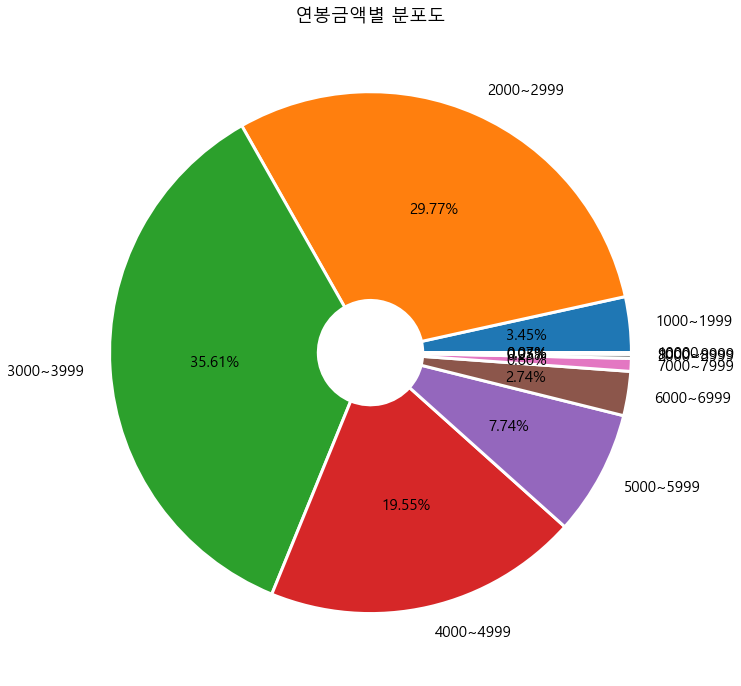

,1000~1999,2000~2999,3000~3999,4000~4999,5000~5999,6000~6999,7000~7999,8000~8999,9000~9999,10000~
0,757,6535,7818,4291,1700,601,175,54,16,7


In [23]:
#파이차트 및 데이터프레임 시각화, 연봉금액별 분포도
#->가장 많은 분포를 가지는 것은 2000~5000 사이의 금액이다.
ratio = list(salaryGroupDict.values())
labels = list(salaryGroupDict.keys())

wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratio, labels=labels, autopct='%.2f%%', wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams["font.size"] = 15
plt.title('연봉금액별 분포도')
plt.show()

salaryGroupList = []
salaryGroupList.append(ratio)

salaryGroupDf = pd.DataFrame(salaryGroupList, columns=('1000~1999', '2000~2999','3000~3999','4000~4999','5000~5999',
                                                       '6000~6999','7000~7999','8000~8999','9000~9999','10000~'))

salaryGroupDf

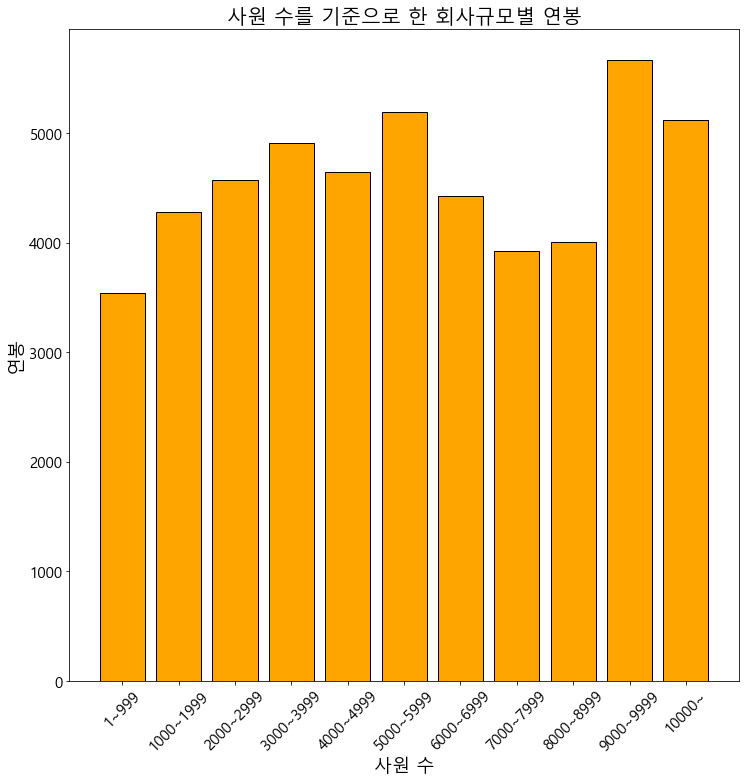

,1~999,1000~1999,2000~2999,3000~3999,4000~4999,5000~5999,6000~6999,7000~7999,8000~8999,9000~9999,10000~
0,3538.34,4280.83,4567.19,4910.58,4642.82,5191.82,4420.92,3925.2,4001.43,5668.6,5119.54


In [24]:
#파이차트 및 데이터프레임 시각화, 사원 수를 기준으로 한 회사 규모별 연봉
#->데이터가 적은 7000이후를 제외하면 회사 규모가 클 수록 연봉이 상승하는 것을 알 수 있다.
ratio = list(empolyeesSalesGroupDict.values())
labels = list(empolyeesSalesGroupDict.keys())

index = np.arange(len(ratio))

plt.bar(index, ratio, color="orange", edgecolor="black")
plt.title('사원 수를 기준으로 한 회사규모별 연봉', fontsize=20)
plt.xlabel('사원 수', fontsize=18)
plt.ylabel('연봉', fontsize=18)
plt.xticks(index, labels, fontsize=15, rotation=45)

plt.show()


empolyeesSalesGroupList = []
empolyeesSalesGroupList.append(ratio)

empolyeesSalesGroupDf = pd.DataFrame(empolyeesSalesGroupList, columns=('1~999', '1000~1999', '2000~2999','3000~3999','4000~4999',
                                                                       '5000~5999','6000~6999','7000~7999','8000~8999','9000~9999',
                                                                       '10000~'))
empolyeesSalesGroupDf